## Project - 3 
(Winter Semester 2022 - 2023)\
Regression Analysis

In [1]:
import pandas as pd
import os

# Plotting
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

# Numpy for linear regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Creating a directory for plots if it doesn't exist

if not os.path.isdir('Plots'):
    os.mkdir("Plots")

In [3]:
# Read dataset
data = pd.read_csv("bodymeasurements.csv")
data

,Age,Sex,ID,Height,Chest,Belly,Thigh,Knee,Calf,Ankle,Biceps,Wrist,Weight
0,21,m,1,174.0,89.5,71.5,51.5,34.5,36.5,23.5,32.5,16.5,65.6
1,23,m,2,175.3,97.0,79.0,51.5,36.5,37.5,24.5,34.4,17.0,71.8
2,28,m,3,193.5,97.5,83.2,57.3,37.0,37.3,21.9,33.4,16.9,80.7
3,23,m,4,186.5,97.0,77.8,53.0,37.0,34.8,23.0,31.0,16.6,72.6
4,22,m,5,187.2,97.5,80.0,55.4,37.7,38.6,24.4,32.0,18.0,78.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,29,f,420,176.5,91.8,69.9,60.6,37.7,37.9,22.4,30.3,15.4,71.8
420,21,f,421,164.4,87.3,63.5,55.2,35.6,33.3,22.4,30.1,15.2,55.5
421,33,f,422,160.7,78.1,57.9,51.8,34.4,34.1,21.2,27.4,15.5,48.6
422,33,f,423,174.0,90.9,72.2,59.0,38.4,36.6,22.0,30.6,15.5,66.4


In [4]:
# Checking nans
nan_rows = data[data.isnull().any(axis=1)]
print("NAN Rows: ", len(nan_rows))

NAN Rows:  0


In [5]:
# Check the columns
list(data.columns)

['Age',
 'Sex',
 'ID',
 'Height',
 'Chest',
 'Belly',
 'Thigh',
 'Knee',
 'Calf',
 'Ankle',
 'Biceps',
 'Wrist',
 'Weight']

In [6]:
# We see that 'ID' column is of no use so we drop the ID column
df = data.drop('ID', axis=1)
df.head()

,Age,Sex,Height,Chest,Belly,Thigh,Knee,Calf,Ankle,Biceps,Wrist,Weight
0,21,m,174.0,89.5,71.5,51.5,34.5,36.5,23.5,32.5,16.5,65.6
1,23,m,175.3,97.0,79.0,51.5,36.5,37.5,24.5,34.4,17.0,71.8
2,28,m,193.5,97.5,83.2,57.3,37.0,37.3,21.9,33.4,16.9,80.7
3,23,m,186.5,97.0,77.8,53.0,37.0,34.8,23.0,31.0,16.6,72.6
4,22,m,187.2,97.5,80.0,55.4,37.7,38.6,24.4,32.0,18.0,78.8


### Check the distribution of data

In [7]:
round(df.describe(), 2)

,Age,Height,Chest,Belly,Thigh,Knee,Calf,Ankle,Biceps,Wrist,Weight
count,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00,424.00
mean,26.90,170.88,92.22,75.28,56.82,36.01,35.88,22.03,30.83,15.97,67.82
std,5.85,9.40,9.60,9.90,4.43,2.54,2.76,1.85,4.27,1.35,12.74
min,18.00,147.20,72.60,57.90,46.30,29.00,28.40,16.40,22.40,13.00,42.00
25%,22.00,163.20,84.78,67.50,53.70,34.30,34.00,20.90,27.28,14.88,57.30
50%,25.00,170.20,90.95,74.10,56.30,35.90,35.80,21.90,30.35,15.90,66.80
75%,31.25,177.80,99.82,82.00,59.50,37.70,37.70,23.10,34.12,17.00,75.62
max,40.00,198.10,116.70,113.20,75.70,45.70,45.00,29.30,42.40,19.60,105.20


In [8]:
df.shape

(424, 12)

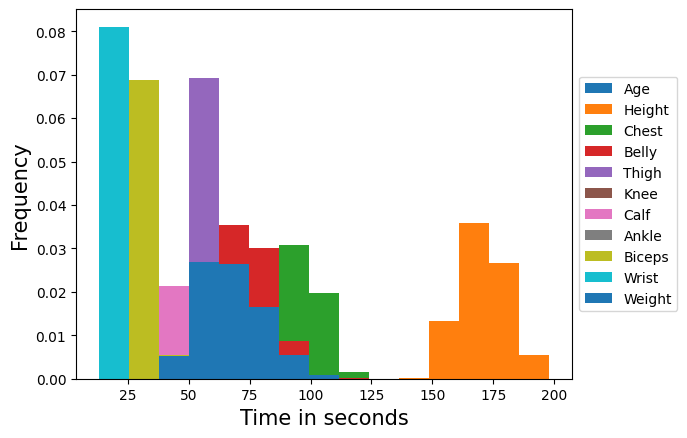

In [9]:
# Histogram plot

freq_dist_fig = df.plot(kind = "hist", density = True, bins=15)

plt.xlabel('Time in seconds', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
#plt.show()
freq_dist_fig.figure.savefig('Plots/Hist.pdf')
freq_dist_fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

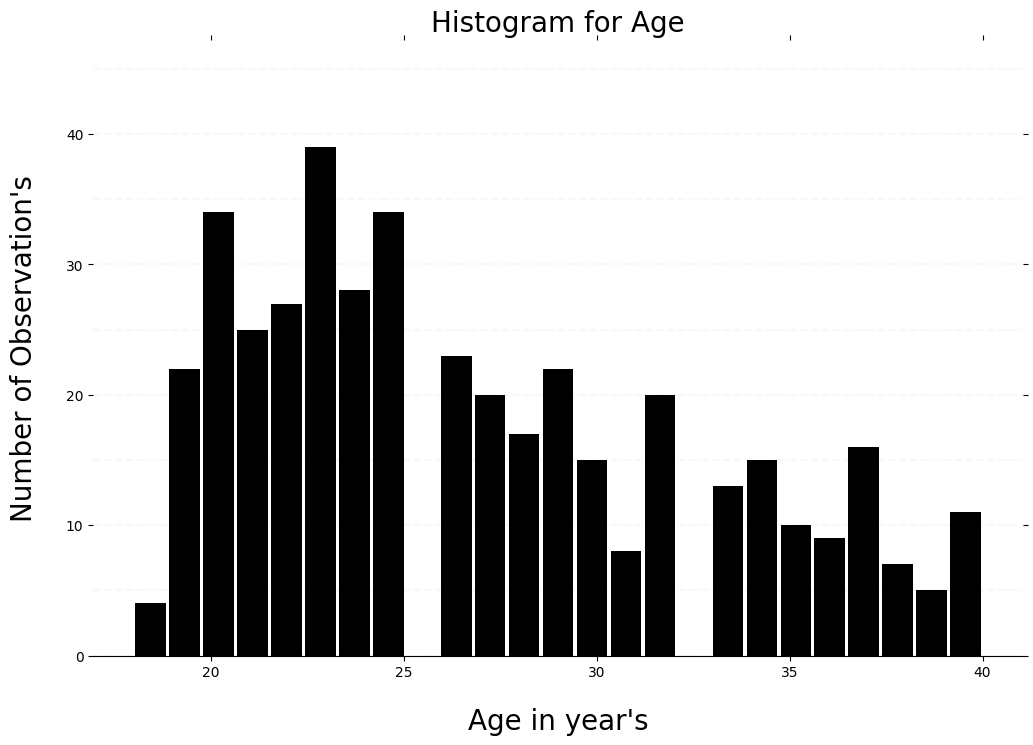

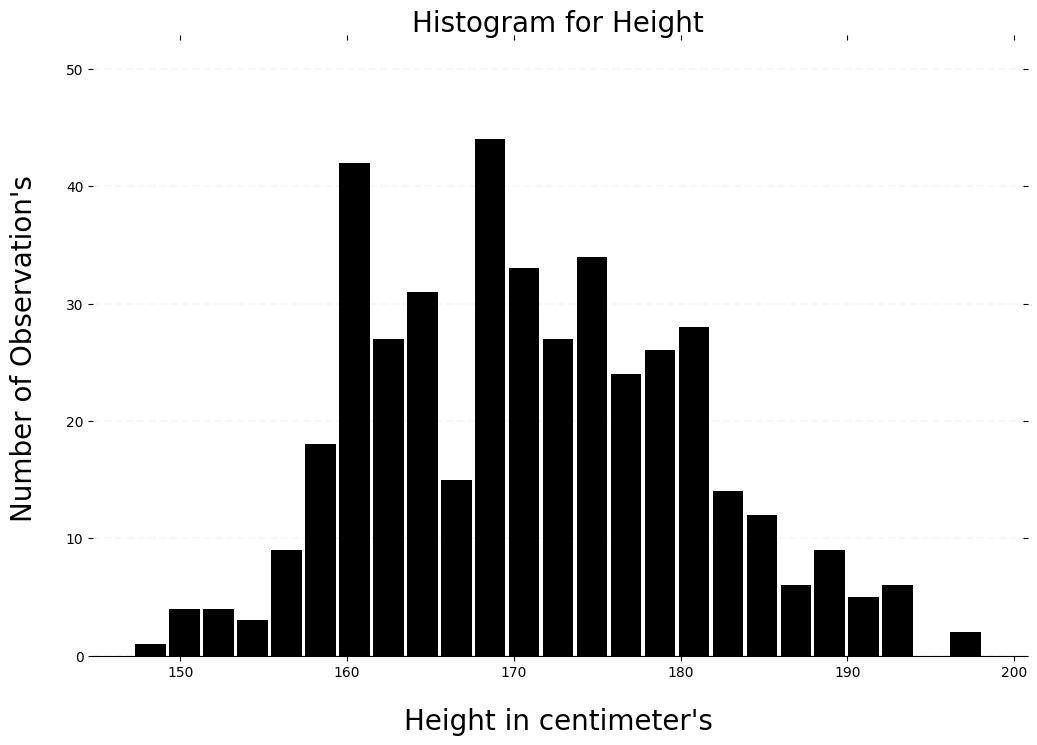

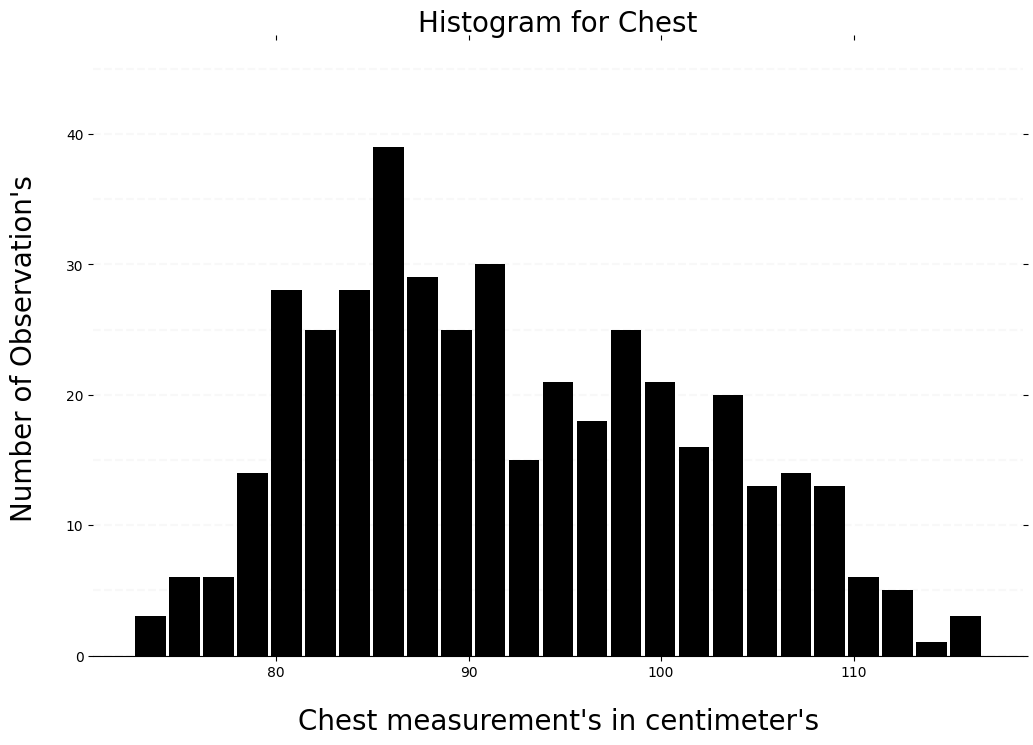

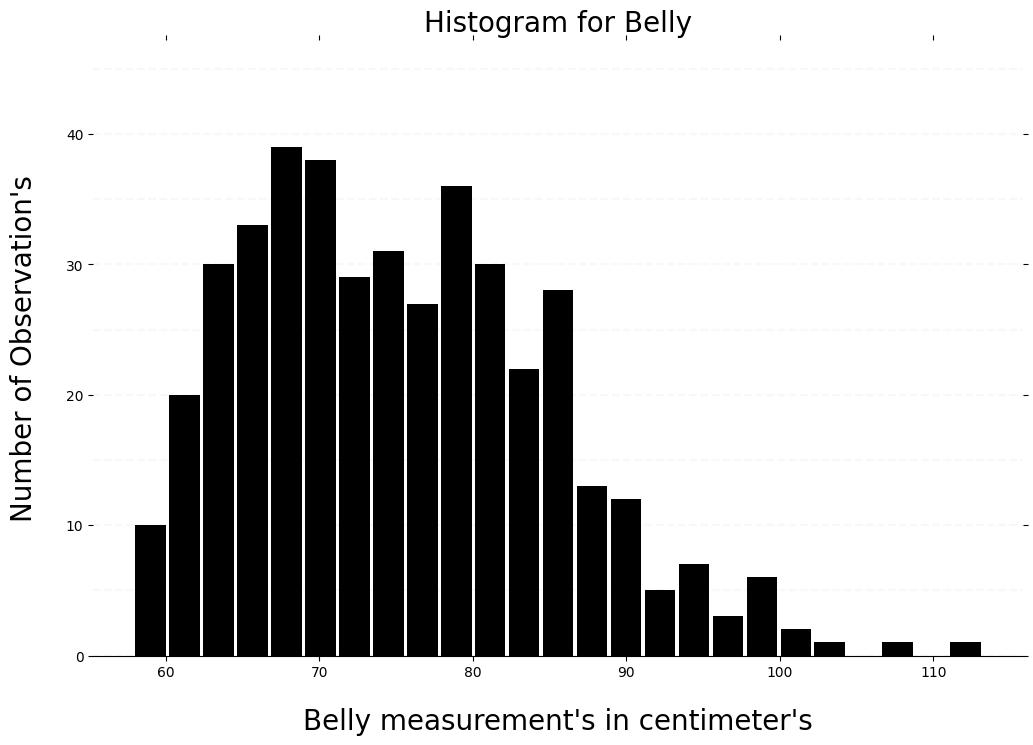

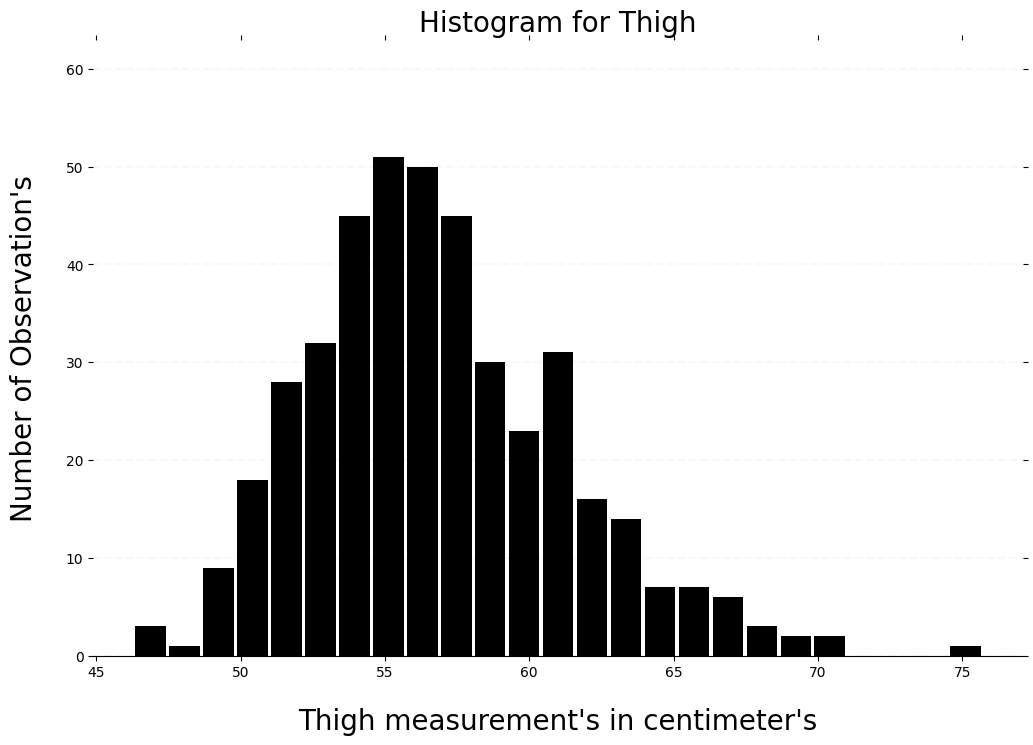

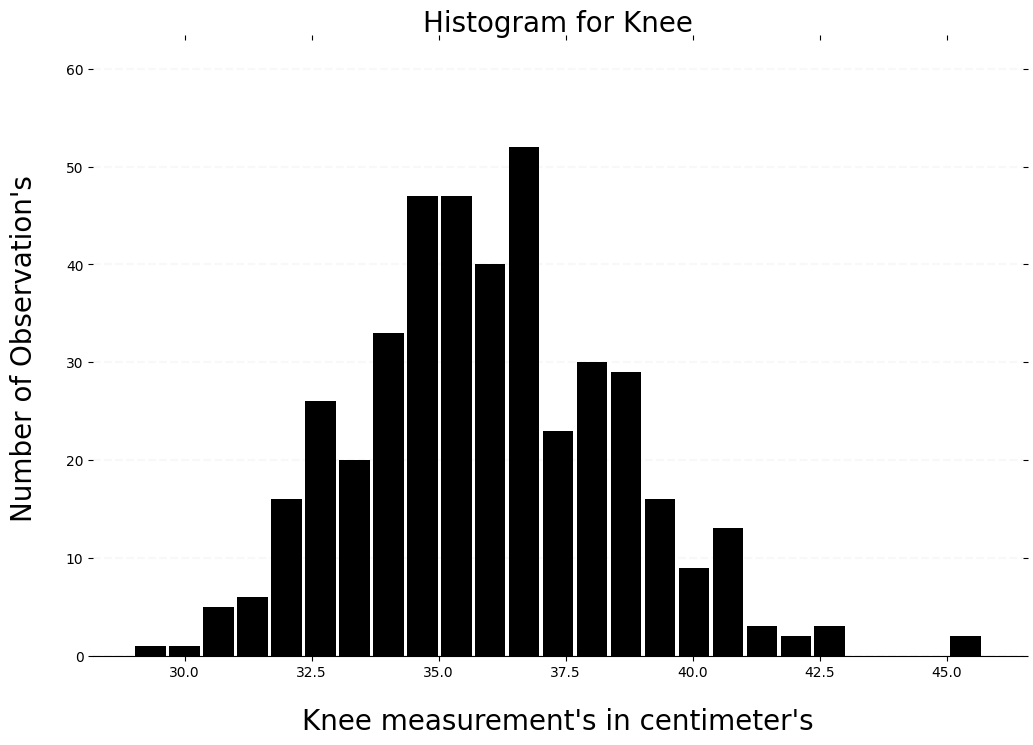

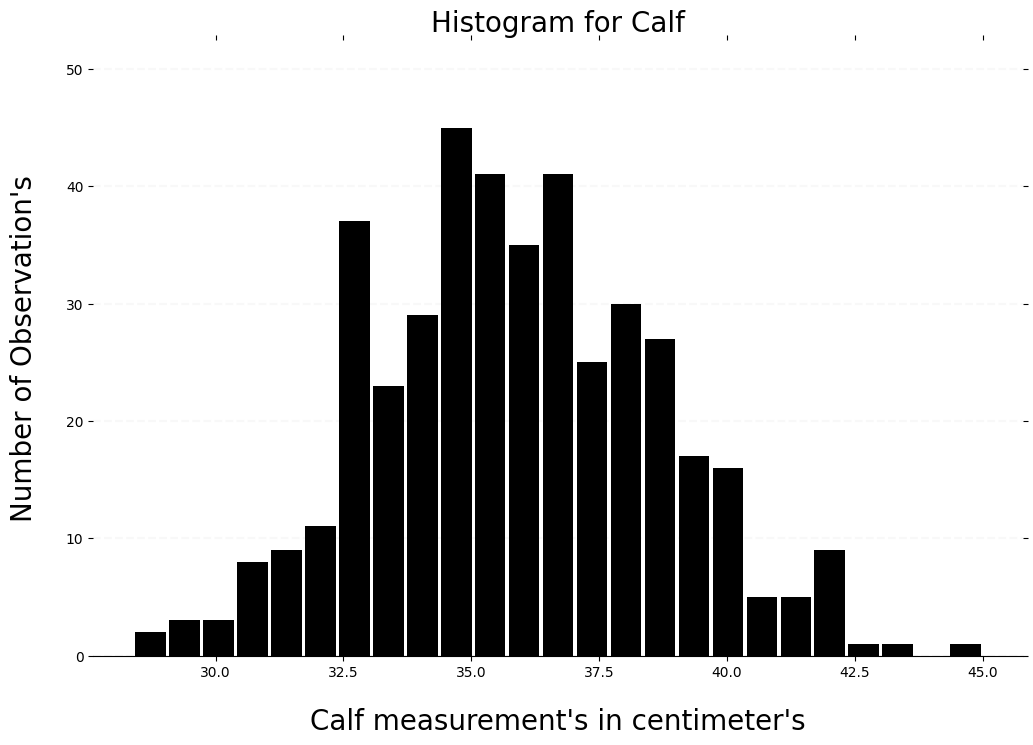

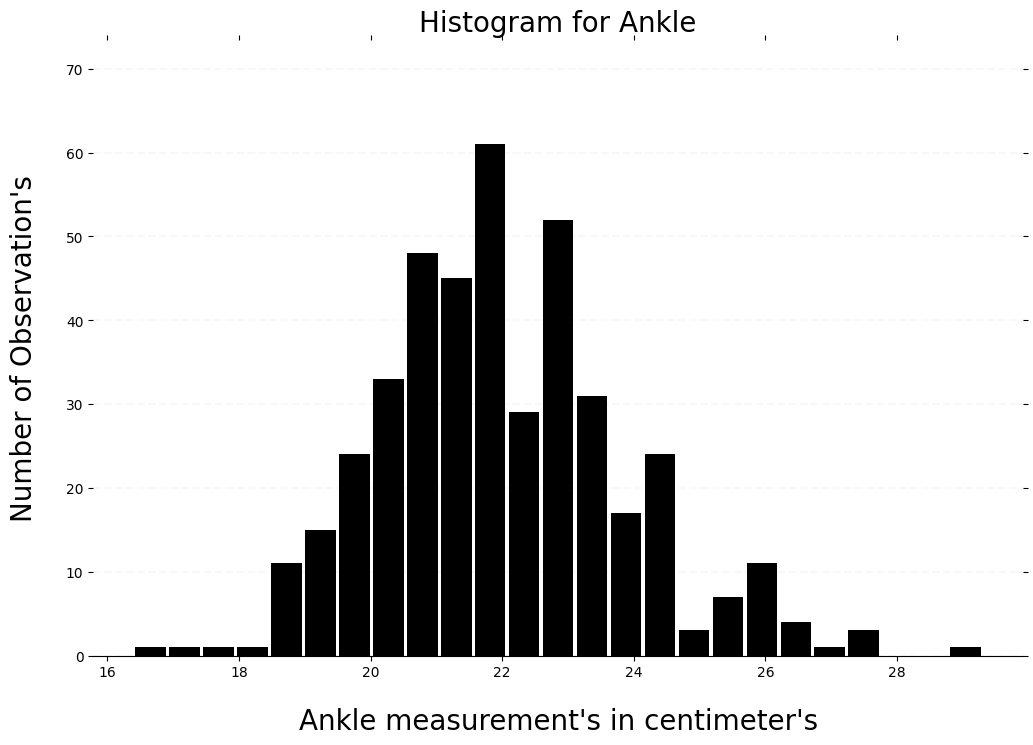

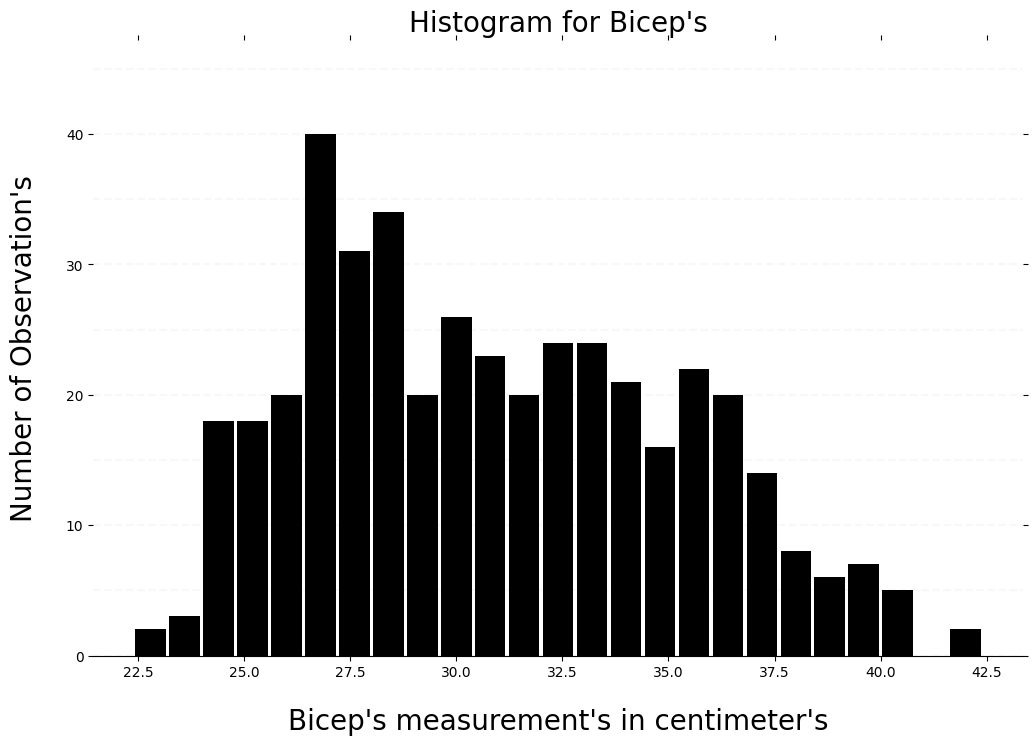

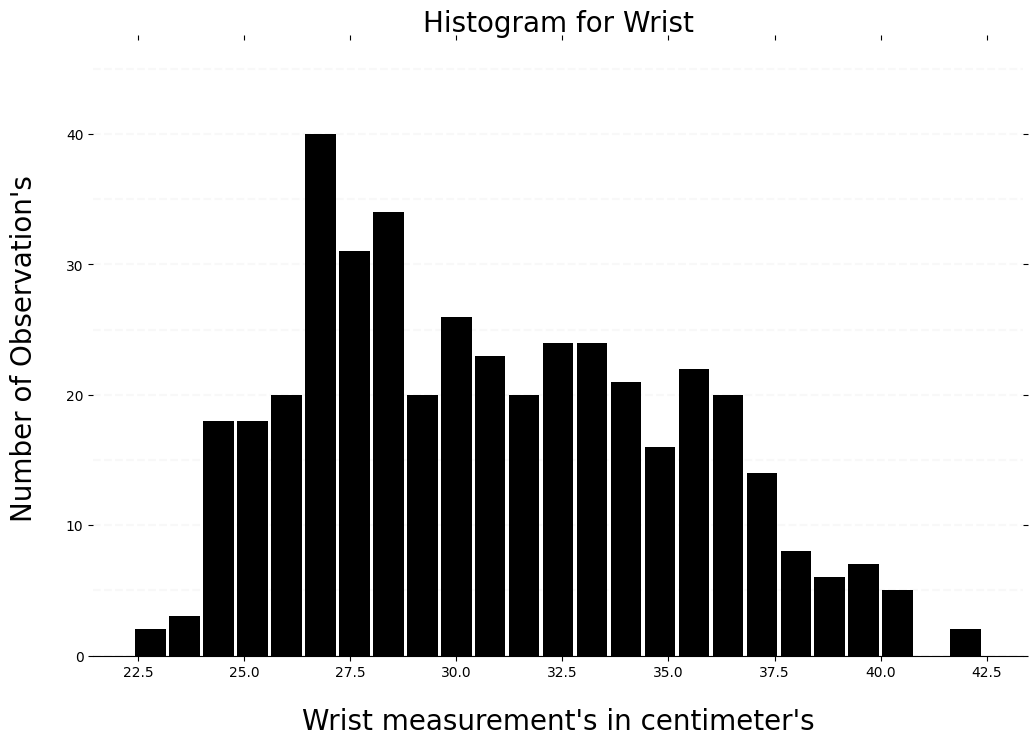

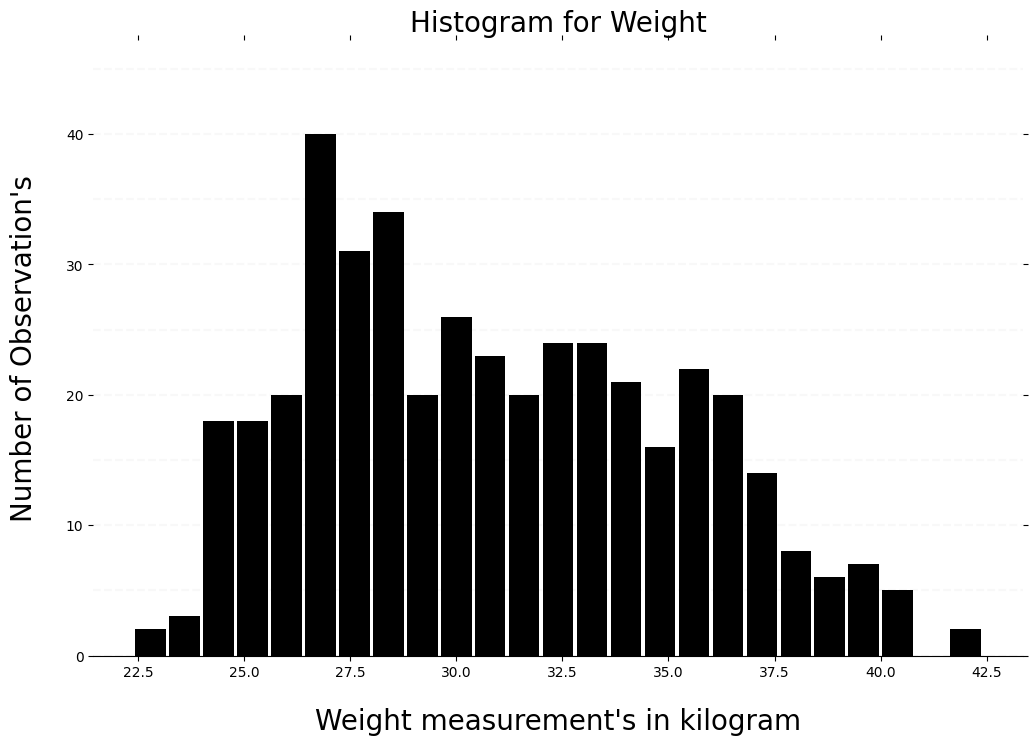

In [10]:
# Histogram for Age

ax = df.hist(column='Age', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Age", size=20)

    # Set x-axis label
    x.set_xlabel("Age in year's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Height

ax = df.hist(column='Height', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Height", size=20)

    # Set x-axis label
    x.set_xlabel("Height in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Chest

ax = df.hist(column='Chest', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Chest", size=20)

    # Set x-axis label
    x.set_xlabel("Chest measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Belly

ax = df.hist(column='Belly', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Belly", size=20)

    # Set x-axis label
    x.set_xlabel("Belly measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Belly

ax = df.hist(column='Thigh', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Thigh", size=20)

    # Set x-axis label
    x.set_xlabel("Thigh measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Knee

ax = df.hist(column='Knee', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Knee", size=20)

    # Set x-axis label
    x.set_xlabel("Knee measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Calf

ax = df.hist(column='Calf', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Calf", size=20)

    # Set x-axis label
    x.set_xlabel("Calf measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Ankle

ax = df.hist(column='Ankle', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Ankle", size=20)

    # Set x-axis label
    x.set_xlabel("Ankle measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Biceps

ax = df.hist(column='Biceps', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Bicep's", size=20)

    # Set x-axis label
    x.set_xlabel("Bicep's measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Wrist

ax = df.hist(column='Biceps', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Wrist", size=20)

    # Set x-axis label
    x.set_xlabel("Wrist measurement's in centimeter's", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


###########################
# Histogram for Weight

ax = df.hist(column='Biceps', bins=25, grid=False, figsize=(12,8), color='#000000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram for Weight", size=20)

    # Set x-axis label
    x.set_xlabel("Weight measurement's in kilogram", labelpad=20, size=20)

    # Set y-axis label
    x.set_ylabel("Number of Observation's", labelpad=20, size=20)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))            

### Task 1: Determine a linear regression model that explains the body height based on all other given variables.

In [11]:
# Prepare data

target_variable = df['Height']

# Create feature variable excluding the target variable and sex variable
features = df.drop('Height', axis=1)
features = df.drop('Sex', axis=1)

In [12]:
target_variable.shape

(424,)

In [13]:
features.shape

(424, 11)

##### Check the assumptions of linear regression

In [14]:
# 1. Linear regression needs the relationship between the independent and dependent variables to be linear.
# Check outliers since linear regression is sensitive to outlies.
# The linearity assumption can best be tested with scatter plots.

# ToDo: Code here

In [15]:
# 2. The linear regression analysis requires all variables to be multivariate normal.
# This assumption can best be checked with a histogram or a QQ-Plot
# Normality can be checked with a goodness of fit test

# ToDo: Code here

In [16]:
# 3. linear regression assumes that there is little or no multicollinearity in the data.
# Multicollinearity occurs when the independent variables are too highly correlated with each other.

# ToDo: Code here

In [17]:
# 4. linear regression analysis requires that there is little or no autocorrelation in the data.
# Autocorrelation occurs when the residuals are not independent from each other.

# ToDo: Code here

In [18]:
x, y = features, target_variable

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict response
y_pred = model.predict(x_)

In [19]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 1.0


In [20]:
print(f"intercept: {intercept}")

intercept: -1.7905676941154525e-12


In [21]:
print(f"coefficients:\n{coefficients}")

coefficients:
[-1.22464823e-13  1.00000000e+00  6.09386673e-15  3.29796954e-14
 -3.01400615e-14  2.16440906e-14 -1.12149873e-14  3.45865914e-14
  1.20595266e-14 -7.10797591e-14 -2.36407844e-14  2.75929453e-16
 -6.28566209e-17 -4.35239410e-16  2.05998413e-17  1.97460321e-16
 -1.93421668e-16  2.02528966e-16 -5.58364119e-16  2.03342117e-16
  8.07513778e-16  5.68121938e-16  6.26668856e-17 -4.45823933e-16
  5.72458747e-17  8.15320034e-17 -3.79904441e-16  7.80625564e-18
  1.94289029e-16 -1.14491749e-16  1.07552856e-16  1.09287579e-16
 -1.24900090e-16  2.08166817e-16 -1.11022302e-16  5.68989300e-16
 -2.49800181e-16  3.88578059e-16  1.11022302e-16  2.49800181e-16
 -2.77555756e-16 -1.66533454e-16  0.00000000e+00 -3.88578059e-16
  1.24900090e-16 -3.33066907e-16  8.32667268e-17 -1.94289029e-16
  1.24900090e-16  1.94289029e-16  1.38777878e-16 -3.88578059e-16
 -4.44089210e-16  6.93889390e-17  7.35522754e-16 -4.16333634e-17
  1.24900090e-16  5.37764278e-17  1.87350135e-16  5.06539255e-16
 -2.6367796

In [22]:
print(f"predicted response:\n{y_pred}")

predicted response:
[174.  175.3 193.5 186.5 187.2 181.5 184.  184.5 175.  184.  180.  177.8
 192.  176.  174.  184.  192.7 171.5 173.  176.  176.  180.5 172.7 176.
 173.5 178.  180.3 180.3 164.5 173.  183.5 175.5 188.  189.2 172.8 170.
 182.  170.  177.8 184.2 186.7 171.4 172.7 175.3 180.3 182.9 188.  177.2
 172.1 167.  169.5 174.  172.7 182.2 164.1 163.  177.  167.  171.8 182.
 177.8 164.5 192.  175.5 181.6 167.4 181.1 177.  174.5 177.5 170.5 182.4
 197.1 180.1 175.5 180.6 184.4 175.5 180.6 177.  177.1 181.6 176.5 175.
 165.1 177.  192.  176.5 169.4 182.1 179.8 184.9 177.3 167.4 178.1 168.9
 157.2 180.3 170.2 177.8 172.7 165.1 186.7 165.1 174.  185.4 177.8 180.3
 180.3 177.8 177.8 177.8 177.8 163.8 188.  198.1 175.3 190.5 172.7 190.5
 168.9 175.3 170.2 190.5 176.5 177.8 180.3 171.4 172.7 177.8 177.8 182.9
 170.2 167.6 175.3 165.1 181.6 190.5 170.2 193.  171.4 177.8 177.8 167.6
 167.6 180.3 182.9 176.5 186.7 188.  188.  177.8 174.  177.8 171.4 185.4
 185.4 188.  175.3 170.5 182.9 170.